In [1]:
from qutip import *
import numpy as np
from math import*
import matplotlib.pyplot as plt

# Basics
States, Operators and Diagonalization

In [2]:
up = basis(2,0)
up

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [3]:
down = basis(2, 1)
down

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [4]:
plus = (up+down)/sqrt(2)
plus

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

In [5]:
#dot/inner product between states
up.overlap(down)

0j

In [6]:
up.overlap(plus)

(0.7071067811865475+0j)

Operators

In [7]:
X = sigmax()
X

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [8]:
Z = sigmaz()
Z

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [9]:
# acting operators on states
X*up

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [10]:
X*down

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [11]:
# Tensor Products (for say 2 qubits)
XoZ = tensor(X, Z)
XoZ

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]
 [ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]]

In [12]:
#We can find eigenstates
en , states = XoZ.eigenstates()

In [13]:
en

array([-1., -1.,  1.,  1.])

In [14]:
states

array([Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.70710678]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]],
       Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [-0.70710678]],
       Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[-0.70710678]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]],
       Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]]], dtype=object)

In [16]:
#Also if you don't want to see all the bajillion states
#you can use the ground state tool
XoZ.groundstate()

(-1.0000000000000002,
 Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.70710678]
  [ 0.        ]
  [-0.70710678]
  [ 0.        ]])

In [17]:
tensor(up, plus)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]]

# Time Evolution
In my opinion, this is the true power of Qutip; simulating how the Hamiltonian changes the states over a period of time.

Example of a classic Hamiltonian (Qubit or Spin 1/2 in a Magnetic Field)
$$H = -\mu \cdot \vec{B} = -\mu B S_z = -\Omega \sigma_z $$

Adapted from https://arxiv.org/pdf/1909.13651.pdf

In [18]:
# The usual matrices
Sz = sigmaz()
Sx = sigmax()
Sy = sigmay()

#specifying the hamiltonian
omega = 5
Hz = -omega*Sz

In [24]:
# list of time steps
t = np.arange(0,4*pi/omega,0.05)
# what operators to take expectation value of of
expect_ops = [Sx,Sy,Sz]
# starting state
psi0 = down
# Put into Schrodinger equation solver
result = sesolve(Hz, psi0, t, expect_ops)


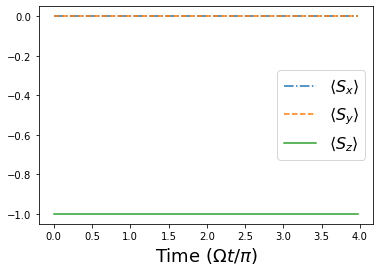

In [25]:
# Plotting Code (ignore)

labels = ['x','y','z']
style = {'x':'-.', 'y':'--', 'z':'-'}
for r,l in zip(result.expect,labels):
    plt.plot(t*omega/pi, r, style[l],
    label="$\langle S_%c \\rangle $" % l)

plt.xlabel("Time ($\Omega t/\pi$)", size=18)
plt.legend(fontsize=16)


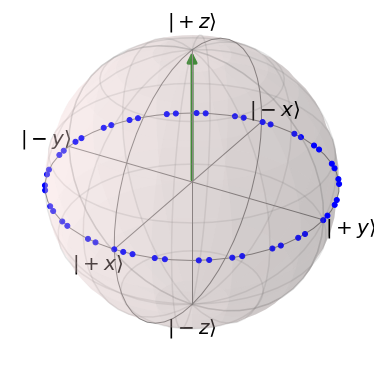

In [21]:
# extracting expectation value from the result
sx, sy, sz = result.expect

# Visualization on Bloch sphere
b = Bloch()
b.add_points([sx,sy,sz])
b.zlabel = ['$\\left|+z\\right>$',
'$\\left|-z\\right>$']
b.ylabel = ['$\\left|+y\\right>$',
'$\\left|-y\\right>$']
b.xlabel = ['$\\left|+x\\right>$',
'$\\left|-x\\right>$']
b.add_vectors([0,0,1])
b.show()

Noise!!!

In [28]:
destroy(3)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0.         1.         0.        ]
 [0.         0.         1.41421356]
 [0.         0.         0.        ]]

In [42]:
# Adding Noise (for fun!)
# Qutip can solve Lindblad Master Equation which simulates errors
strength1 = 1.5
strength2 = 0.5
noise_op = create(2) # this is sigma - or something that takes 1 state to 0 state
c_ops = [strength1 * destroy(2), strength2 * create(2)] # This is list of noise or collapse operators
# I have added energy relaxation

#input to master equation solver
noisy_result = mesolve(Hz, plus, t, c_ops, expect_ops)

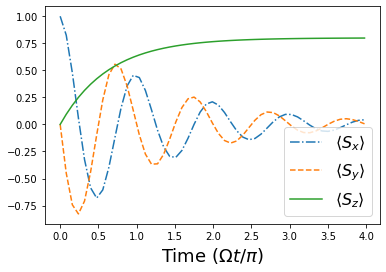

In [43]:
# Plotting Code (ignore)

labels = ['x','y','z']
style = {'x':'-.', 'y':'--', 'z':'-'}
for r,l in zip(noisy_result.expect,labels):
    plt.plot(t*omega/pi, r, style[l],
    label="$\langle S_%c \\rangle $" % l)

plt.xlabel("Time ($\Omega t/\pi$)", size=18)
plt.legend(fontsize=16)

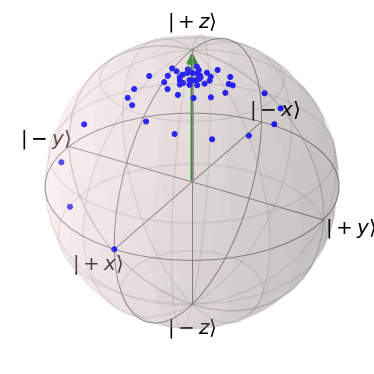

In [44]:
# extracting expectation value from the result
sx, sy, sz = noisy_result.expect
# Visualization on Bloch sphere
b = Bloch()
b.add_points([sx,sy,sz])
b.zlabel = ['$\\left|+z\\right>$',
'$\\left|-z\\right>$']
b.ylabel = ['$\\left|+y\\right>$',
'$\\left|-y\\right>$']
b.xlabel = ['$\\left|+x\\right>$',
'$\\left|-x\\right>$']
b.add_vectors([0,0,1])
b.show()

# Conclusion 

Qutip can do a lot more! Check out such example and tutorial notebooks here: 
https://qutip.org/tutorials.html